# ST7565R Intro
- dot-matric LCD driver that incorporates an d LCD controller and common/segment drivers
- display data recieved from MPU stored in internal Display Data RAM (DDRAM) of 65*132 bits
- bits stored in DDRAM directly related to pixels in LCD panel
    - **Segment Driver**: control horizontal lines (columns) of the LCD
        - there are 132 segment outputs, SEG0 to SEG131
    - **Common Drivers**: Control vertical lines (rows) of LCD
        - there are 64 common outputs, COM0 to COM63 + 1 icon common output
- NHD uses Serial Interface (SPI-4) which is *write only*

# 4-line SPI Interface
- when IC is active (CS is low), serial data and serial clock inputs are enabled
- when IC not active (CS is high), internal 8-bit shift register and 3-bit counter are reset
- serial data on SI latched on rising edg of SCK, after 8th clock, serial data will be proccessed to be 8-bit parallel data
- address pin selection (A0), which is latched at the 8th clock indicates if 8-bit parallel data is an instruction (low) or display data (high)
- **read feature not available in this mode**
- DDRAM column address pointer will be increased by one automatically after each byte of DDRAM access


# Display Data RAM (DDRAM)
- stores the dot data of the LCD
- addressable array with 132 columns by 65 rows (8-page with 8-bit and 1-page with 1-bit)
- the rows are divided into 8 pages (Page-0 to Page-7), and each page is divided into 8 lines of pixels for COM0 to COM63
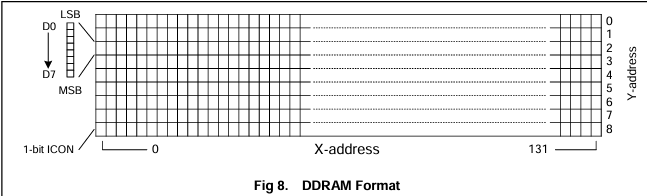
    - so essentially, we can have 8 rows of characters
- The display data (D7~D0) corresponds to the LCD common-line direction and D0 is at the top
- all pages can be accessed via D[7:0] except icon page

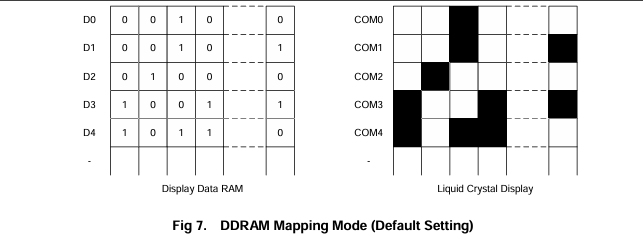

## Page Address Ciruit
- includes a 4-bit address register which van be modified by the 'Page Address Set' instruction
- page address must be set before accessing DDRAM content

## Column Address Circuit
- column address specified by the 'Column Address Set command'
- has an 8-bit preset coounter that provides Column Address to the DDRAM
- column address automatically increments from start up to the end column, and will return to the start address as the end column is reached
## Special Note
- **Registers MX and MY allow you to invert relationship between DDRAM and the outputs (COM/SEG), though one would have to rewrite the display data into DDRAM after changing MX setting**

# USEFUL LINKS
- Font table of ASCII characters: https://github.com/NewhavenDisplay/NHD-1.69-160128UGC3_Example/blob/master/examples/test/test.ino

